Transforms are mathematical tools that help transform the dataset into normalized form so that the curve is normal ... normal curve is very important in field of machine learning as it changes the accuracy drastically 

## Types : 

#### 1) Feature Transformation 

a) log transformer

b) reciprocal

c) power (sq/sqrt)

#### 2) Power Transformer 

a) Box-Cox

b) Yeo-Johnson

#### 3) Quantile Transformer

## How to find if data is normal? 

Ans: QQ Plot 

In [1]:
import scipy.stats as stats  # this lib is used for qq plot

## Feature Transformation 

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

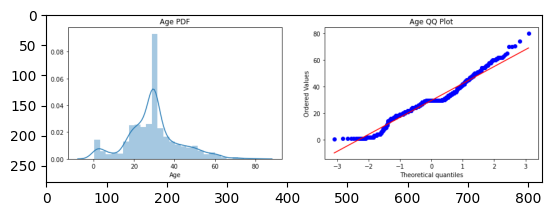

In [2]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 

plt.imshow(img.imread('/home/sarthak/.config/joplin-desktop/resources/73ed5f56c60d493ca0135a49a446cb23.png'))

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

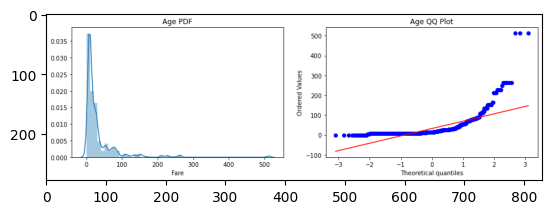

In [3]:
plt.imshow(img.imread('/home/sarthak/.config/joplin-desktop/resources/d6cd3ff8dde740bab0c313ed3c28b481.png'))

In [ ]:
trf = FunctionTransformer(func=np.log1p)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

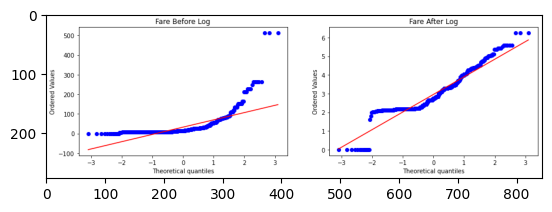

In [5]:
plt.imshow(img.imread('/home/sarthak/.config/joplin-desktop/resources/c9a8973b18b5403eb0a1a3339c231cfd.png'))

In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

## Power Transformer

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

In [ ]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})